<pre style='font-size :25px; text-align: center'><b>ASSIGNMENT 2</b></pre>
<pre style='font-size :20px'><b>HYPERPARAMETERS TUNING</b></pre>
<pre style='font-size :15px'>Welcome to the second assignment in classification module. 
Today, in addition to greed search of classifier we will also use hyperparameter tuning,
and choose the best classifier with best hyperparameters.
That should improve our final score on kaggle.
We will also construct one extra feature to boost the performance.</pre>

<pre style='font-size : 20px'><b>PART 1</b></pre>
<pre style='font-size : 18px'><b>Feature engineering and scaling</b></pre>
<pre style='font-size : 15px;'>Firstly let's import necessary packages and load our data.</pre>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [53]:
seed = 5
sns.set()

In [54]:
def load_data(file):
    url = 'https://raw.githubusercontent.com/HikkaV/VNTU-ML-Courses/master/assignments/machine_learning/files/{}'.format(file)
    try:
        df = pd.read_csv('../files/{}'.format(file))
    except:
        df = pd.read_csv(url)
    return df

In [55]:
df = load_data('train.csv')

In [56]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<pre style='font-size : 15px;'>Now, let's create our new feature based on titles from Name column.
For this task we will use regex. We will also put an 'unk' token for those 
that don't include the title.
</pre>

In [57]:
df['mr_ms_feature'] = df['Name'].str.findall('(,\sMr.|,\sMiss.|,\sMrs.)')

In [58]:
df['mr_ms_feature'] = df['mr_ms_feature'].apply(lambda x: x[0].replace(',','').lstrip() if x else 'unk')

In [59]:
df['mr_ms_feature'].unique()

array(['Mr.', 'Mrs', 'Miss.', 'unk'], dtype=object)

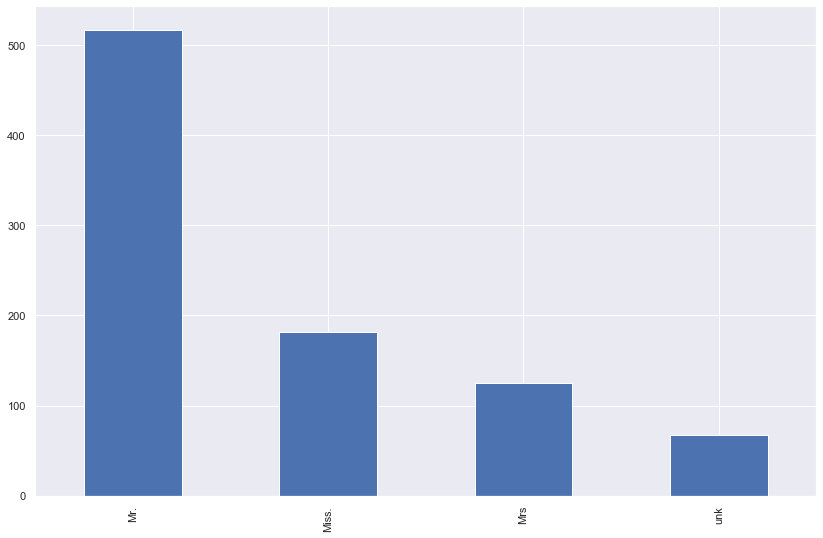

In [60]:
df['mr_ms_feature'].value_counts().plot.bar(figsize=(14,9));

<pre style='font-size : 15px;'>For simplicity we copied the functions used in previous assignment.
We also made another function named <b>process_data</b>, which process the training data, 
now imputing missing data with KNN based values.
</pre>

In [61]:
def convert(df,columns_to_convert):
    dict_columns = {}
    for column_name in columns_to_convert:
        dict_column = dict((i,c) for c,i in enumerate(df[column_name].unique()))
        dict_columns.update({column_name:dict_column})
        df[column_name] = df[column_name].apply(lambda x: dict_column.get(x))
    return df,dict_columns

def preprocess(df,columns_to_use):
    imputer = KNNImputer(n_neighbors=2,weights='uniform')
    for column_name in columns_to_use:
        try:
       
            df[column_name] = imputer.fit_transform(df[column_name].values.reshape(-1,1))
        except:
            df[column_name] = df[column_name].fillna('unknown')
    return df

def process_data(df):
    columns_to_use = list(df.columns)
    columns_to_convert = ['Sex','Cabin','Embarked','Ticket','mr_ms_feature']
    target = columns_to_use.pop(columns_to_use.index('Survived'))
    df = preprocess(df.copy(),columns_to_use)
    df,dict_columns = convert(df,columns_to_convert)
    df['Relatives'] = df['SibSp'] + df['Parch']
    columns_to_use.append('Relatives')
    return df, dict_columns 

In [62]:
data_set, dict_columns = process_data(df)

In [63]:
data_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mr_ms_feature,Relatives
0,1.0,0,3.0,"Braund, Mr. Owen Harris",0,22.0,1.0,0.0,0,7.2500,0,0,0,1.0
1,2.0,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1.0,0.0,1,71.2833,1,1,1,1.0
2,3.0,1,3.0,"Heikkinen, Miss. Laina",1,26.0,0.0,0.0,2,7.9250,0,0,2,0.0
3,4.0,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1.0,0.0,3,53.1000,2,0,1,1.0
4,5.0,0,3.0,"Allen, Mr. William Henry",0,35.0,0.0,0.0,4,8.0500,0,0,0,0.0


In [64]:
usecols = list(data_set.columns)
usecols.remove('Name')
usecols.remove('PassengerId')

In [65]:
usecols

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'mr_ms_feature',
 'Relatives']

In [66]:
data_set = data_set[usecols]

In [67]:
def highlight_big_corr(val):
    val = np.abs(val)
    if val>=0.2 and val<0.4:
        color = 'blue'
    elif val>=0.4:
        color='red'
    else:
        color = 'black'
    return 'color: %s' % color
    

<pre style='font-size : 15px;'>Finnaly let's construct the correlation matrix.

<li><font color='red'>high correlation</font></li>
<li><font color='blue'>medium correlation</font></li>
<li><font color='black'>low correlation</font></li>
We see that our new feature <b>mr_ms_feature</b> have high correlation score,
which proves that constructing it was a right choice.
</pre>

In [68]:
corr = data_set.corr()
corr.style.applymap(highlight_big_corr)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mr_ms_feature,Relatives
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,-0.047298,0.257307,0.270495,0.118026,0.438282,0.016639
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.017489,-0.549500,-0.623554,0.028566,-0.105601,0.065997
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,-0.132709,0.182333,0.082104,0.128526,0.616374,0.200988
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.120275,0.091566,0.216722,0.023578,-0.286068,-0.248512
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,-0.303229,0.159651,-0.058893,-0.063794,0.286484,0.890712
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,-0.273002,0.216225,-0.003678,-0.082144,0.289985,0.783111
Ticket,-0.047298,-0.017489,-0.132709,0.120275,-0.303229,-0.273002,1.000000,-0.142578,0.212438,-0.037227,-0.158872,-0.343634
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,-0.142578,1.000000,0.397105,0.071010,0.148783,0.217138
Cabin,0.270495,-0.623554,0.082104,0.216722,-0.058893,-0.003678,0.212438,0.397105,1.000000,0.016607,0.073133,-0.042089
Embarked,0.118026,0.028566,0.128526,0.023578,-0.063794,-0.082144,-0.037227,0.071010,0.016607,1.000000,0.132975,-0.084639


In [69]:
target = usecols.pop(usecols.index('Survived'))

In [70]:
data_X, data_y = data_set[usecols], data_set[target]

In [71]:
data_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<pre style='font-size : 15px;'>As always we will scale our data using MinMaxScaler.</pre>

In [72]:
data_X = MinMaxScaler().fit_transform(data_X)

<pre style='font-size : 20px'><b>PART 2</b></pre>
<pre style='font-size : 18px'><b>Hyperparameters tuning and greed search</b></pre>

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

<pre style='font-size : 15px;'>First of all, let's consider the example of hyperparameter tuning
on SVC (Support Vector Classifier). For conducting this process we will use grid search,
that actually searches for best hyperparameters with respect 
to cross validation score on specific metric.
<i>Note that we are using StrattifiedKFold which splits our data 
to have generally equal number of classes in each subset.</i> 
To use grid search we need to create the dictionary with tunable parameters as keys and 
their possible values as values (could be list/tuples). For SVC we want to tune such parameters as 
C (regularization parameter), kernel (kernel function used to transform features)
and degree (degree of polynomial if the poly kernel is picked)</pre>

In [74]:
space_params_svc={'C' : [0.01,0.1,1,10,100],
                    'kernel' : ['linear', 'poly', 'rbf'], 
                    'degree' : (1,2,3)
                    }

<pre style='font-size : 15px;'>We will use StratifiedKFold with 5 splits.</pre>

In [75]:
kfolds = StratifiedKFold(5)

<pre style='font-size : 15px;'>Now let's create a grid search instance and define the function
with respect to which we want to optimize the parameters.</pre>

In [76]:
gscv = GridSearchCV(SVC(random_state=seed),param_grid=space_params_svc,
                    cv=kfolds.split(data_X,data_y),
                    scoring='f1')

<pre style='font-size : 15px;'>Finnaly, we will fit the grid search instance to get the best parameters.</pre>

In [77]:
gscv.fit(data_X,data_y)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x12313bb50>,
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=5, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': (1, 2, 3),
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

<pre style='font-size : 15px;'>After fitting the grid search we can get the best estimator and see
the best cross validation score of it.</pre>

In [78]:
gscv.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=5, shrinking=True, tol=0.001,
    verbose=False)

In [79]:
gscv.best_score_

0.7596775874544031

<pre style='font-size : 15px;'>With previous example shown we are ready to use greed search
along with hyperparameters tuning to find the best classifier with best parameters.
To achive this goal we will define the dictionary with classifier names,
classifier instances and their tunable hyperparameters.
Note, that you can actually optimize the bigger space of hyperparameters to get much better results
(we encourage you to do so),
but for convenience and simplicity we choose only those spaces, in which grid search will work fast.</pre>

In [80]:
classifiers_dict = {'LogisticRegression':(LogisticRegression(
    random_state=seed),{'C' : [0.001,0.01,0.1,10,100],
                    'penalty' : ['l2', 'l1']
                    }),
 'SVC': (SVC(random_state=seed), {'C' : [0.001,0.01,0.1,10,100],
                    'kernel' : ['linear', 'poly', 'rbf'], 
                    'degree' : (1,2,3)
                    }),
 'DecisionTreeClassifier': (tree.DecisionTreeClassifier(random_state=seed), {'max_depth' : [2,3,4,5,6],
                                                                            'min_samples_split': [2,6,8,10,15],
                                                                            'min_samples_leaf' : [2,4,8],
                                                                            'max_features' : [2,3,4,5,6,7,8]} ),
 'RandomForestClassifier':(RandomForestClassifier(random_state=seed),{'max_depth' : [2,3,4,5,6],
                                                                            'min_samples_split': [2,6,8,10,15],
                                                                            'min_samples_leaf' : [2,4,8],
                                                                            'max_features' : [2,8],
                                                                                   }),
 'GradientBoostingClassifier': (GradientBoostingClassifier(random_state=seed),{'max_depth' : [2,3,4,5,6],
                                                                            'min_samples_split': [2,6,8,10,15],
                                                                            'min_samples_leaf' : [2,4,6,8],
                                                                            'max_features' : [2,8],
                                                                            
                                                                           })
}

<pre style='font-size : 15px;'>We designed a new function <b>call_grid_search</b>, 
that finds the best parameters for given classifier with respect to given metric.
After the best hyperparameters are chosen for the given classifier, we can compare its
results with other classifier and choose the best (the same thing as we did in previous 
assignment, but using optimized parameters instead of default ones).</pre>

In [81]:
def call_grid_search(clf,data_X,data_y,scoring,cv):
    classifier, params = clf
    kfolds = StratifiedKFold(cv)
    gscv = GridSearchCV(classifier,param_grid=params, cv=kfolds.split(data_X,data_y), scoring=scoring,n_jobs=-1)
    gscv.fit(data_X,data_y)
    return gscv
    
def choose_best_classifier(classifiers_dict,data_X,data_y,scoring='precision',cv=5):
    best_score = 0
    best_clf = None
    for name, clf in classifiers_dict.items():
        gscv = call_grid_search(clf,data_X,data_y,scoring,cv)
        score = gscv.best_score_
        print('Classifier : {0}, mean {1} : {2}'.format(name,scoring, score))
        if score>best_score:
            best_score = score
            best_clf = (name,gscv.best_estimator_)
    print('Best classifier : {0}, mean {1} : {2} '.format(best_clf[0],scoring,best_score))
    return best_clf

<pre style='font-size : 15px;'>We are ready to define the best classifier with best 
hyperparameters and perform the final training.</pre>

In [82]:
name, clf = choose_best_classifier(classifiers_dict,data_X,data_y,'f1')

Classifier : LogisticRegression, mean f1 : 0.7382183176300823
Classifier : SVC, mean f1 : 0.7495543682379602
Classifier : DecisionTreeClassifier, mean f1 : 0.7601928714696706
Classifier : RandomForestClassifier, mean f1 : 0.7784225990270344
Classifier : GradientBoostingClassifier, mean f1 : 0.7783787787246317
Best classifier : RandomForestClassifier, mean f1 : 0.7784225990270344 


In [83]:
clf.fit(data_X,data_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

<pre style='font-size : 20px'><b>PART 3</b></pre>
<pre style='font-size : 18px'><b>Making prediction for kaggle</b></pre>

<pre style='font-size : 15px;'>To simplify everything, an overall function <b>load_and_process</b> 
that is used to process test data and make predictions based on it was created.</pre>

In [84]:
def convert_for_predict(df, columns_to_convert,dict_convert):
    imputer = KNNImputer(n_neighbors=2,weights='uniform')
    for i in columns_to_convert:
        dict_column = dict_convert.get(i)
        df[i] = df[i].apply(lambda x: dict_column.get(x))
        df[i] = imputer.fit_transform(df[i].values.reshape(-1,1))
    return df

In [85]:
def load_and_process(path,clf,dict_columns):
    test = load_data(path)
    submission_form = test.copy()
    test['mr_ms_feature'] = test['Name'].str.findall('(,\sMr.|,\sMiss.|,\sMrs.)')
    test['mr_ms_feature'] = test['mr_ms_feature'].apply(lambda x: x[0].replace(',','').lstrip() if x else 'unk')
    columns_to_use = list(test.columns)
    columns_to_use.remove('Name')
    columns_to_use.remove('PassengerId')
    test = preprocess(test,columns_to_use)
    columns_to_convert = ['Sex','Cabin','Embarked','Ticket','mr_ms_feature']
    test = convert_for_predict(test,columns_to_convert=columns_to_convert,dict_convert=dict_columns)
    test['Relatives'] = test['SibSp'] + test['Parch']
    columns_to_use.append('Relatives')
    X = test[columns_to_use]
    X = MinMaxScaler().fit_transform(X)
    prediction = clf.predict(X)
    submission_form['Survived'] = prediction
    submission_form = submission_form[['PassengerId','Survived']]
    return submission_form

In [50]:
submission_form = load_and_process('test.csv',clf,dict_columns)

In [51]:
submission_form.to_csv('submission.csv',index=False)

<pre style='font-size : 15px;'>Our final solution will lead to the score of 78 on kaggle,
which is much better than we did before. 
Now, you should understand the boost of hyperparameters tuning
and feature engineering. 
Searching in depth of hyperparameters will obviously lead to even better results.
Next time you will be introduced to the concepts of multiclassification.</pre>

<pre style='font-size : 15x'>Note, for downloading file from colab you can use 
the <a href='https://machine-learning-and-data-science-with-python.readthedocs.io/en/latest/howtostart.html'>following</a> page of our wiki. To submit the the highlited solution to kaggle 
go to this <a href='https://www.kaggle.com/c/titanic'>page</a>, create kaggle account if needed and press the submit button. Then you should load
the submission.csv file.</pre>